In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
basket1 = ['ETH-USD','AVAX-USD','MATIC-USD']
basket2 = ['BTC-USD','XRP-USD','XLM-USD']
basket3 = ['DOGE-USD','SHIB-USD','ELON-USD']

def get_data(cryptocurrency):
    cryptocurrency_df = yf.download(cryptocurrency, period = '2y')['Close']
    cryptocurrency_df.dropna(inplace = True)
    return cryptocurrency_df


In [3]:
def fetch_last_price(cryptocurrency_df, basket):
    # Save the last day's closing price
    curr_last_price_1 = cryptocurrency_df[basket[0]][-1]
    curr_last_price_2 = cryptocurrency_df[basket[1]][-1]
    curr_last_price_3 = cryptocurrency_df[basket[2]][-1]
    return curr_last_price_1, curr_last_price_2, curr_last_price_3


In [4]:
def pct_change_std_mean(cryptocurrency_df):
    # Calculate the daily roi for the stocks
    daily_returns_cryptocurrency = cryptocurrency_df.pct_change()
    # Calculate volatility
    std_dev_daily_return = daily_returns_cryptocurrency.std()
    avg_daily_return = daily_returns_cryptocurrency.mean()
    return daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return



In [5]:
def monte_carlo_simulation(basket):
    # Setup the Monte Carlo Parameters
    number_simulations = 100
    number_records = 90
    monte_carlo = pd.DataFrame()
    # Run the Monte Carlo Simulation
    for x in range(number_simulations):

        print(f"Running Simulation {x}...")

        curr1_price = [curr1_last_price]
        curr2_price = [curr2_last_price]
        curr3_price = [curr3_last_price]

        for n in range(number_records):

            simulated_prices = curr1_price[-1] * (1 + np.random.normal(avg_daily_return[basket[0]], std_dev_daily_return[basket[0]]))
            curr1_price.append(simulated_prices)

            simulated_prices = curr2_price[-1] * (1 + np.random.normal(avg_daily_return[basket[1]], std_dev_daily_return[basket[1]]))
            curr2_price.append(simulated_prices)

            simulated_prices = curr3_price[-1] * (1 + np.random.normal(avg_daily_return[basket[2]], std_dev_daily_return[basket[2]]))
            curr3_price.append(simulated_prices)

       # Create a DataFrame of the simulated prices  
        portfolio = pd.DataFrame({
            f"{basket[0]} Simulated Prices": curr1_price,
            f"{basket[1]} Simulated Prices": curr2_price,
            f"{basket[2]} Simulated Prices": curr3_price
        })


        portfolio_returns=portfolio.pct_change()   

        weights = [0.33, 0.33, 0.34]


        weighted_portfolio_returns = portfolio_returns.dot(weights) 

        monte_carlo[x] = (1+ weighted_portfolio_returns.fillna(0)).cumprod()
    return monte_carlo



In [6]:
def graph(basket):
    # Visualize the Simulation
    monte_carlo.plot(legend=None, title = f"Simulated {basket[0]} {basket[1]} {basket[2]} Portfolio over the next 90 days")
    plt.show() 
    


In [7]:
def graph2(basket):
    cumulative_returns = monte_carlo.iloc[-1]
    confidence_intervals = cumulative_returns.quantile(q=[0.05, 0.95])
    crypto_returns = cumulative_returns
    crypto_conf_interval = confidence_intervals

    crypto_returns.plot(kind='hist', bins=10, title = f"Confidence Interval of {basket[0]} {basket[1]} {basket[2]} Portfolio")
    plt.axvline(crypto_conf_interval.iloc[0], color='r')
    plt.axvline(crypto_conf_interval.iloc[1], color='r')
    plt.show()

### Basket_1

[*********************100%***********************]  3 of 3 completed
Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulati

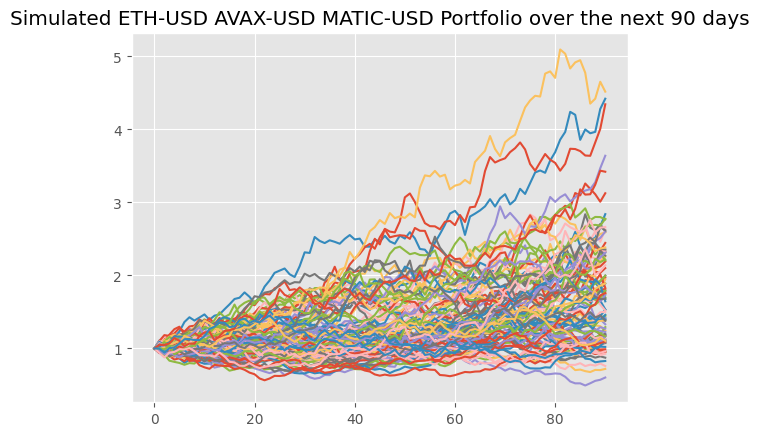

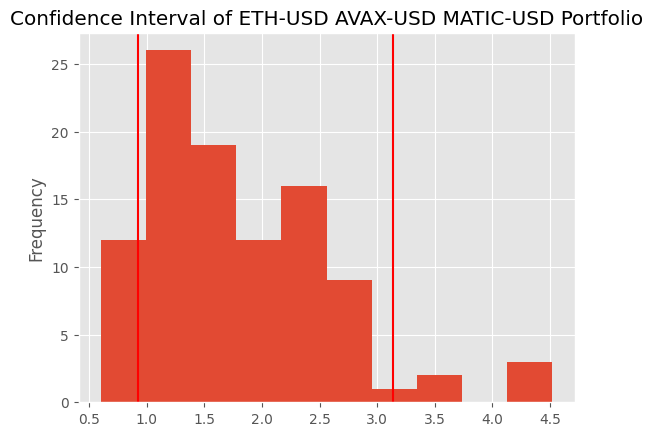

,AVAX-USD,ETH-USD,MATIC-USD
AVAX-USD,1.000000,0.813965,0.783967
ETH-USD,0.813965,1.000000,0.856110
MATIC-USD,0.783967,0.856110,1.000000


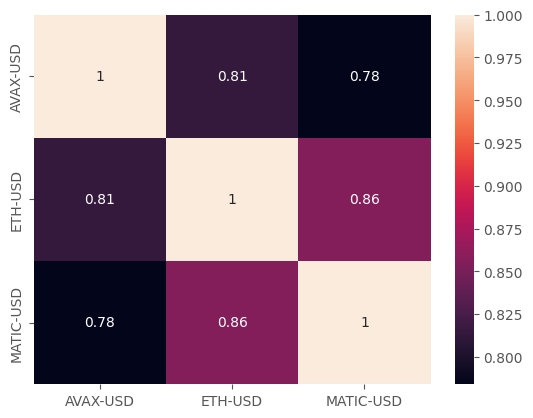

In [8]:
df = get_data(basket1)
curr1_last_price,curr2_last_price, curr3_last_price = fetch_last_price(df, basket1)
daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return = pct_change_std_mean(df)
monte_carlo = monte_carlo_simulation(basket1)
graph(basket1)
graph2(basket1)
#correlation
display(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

### Basket_2

[*********************100%***********************]  3 of 3 completed
Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulati

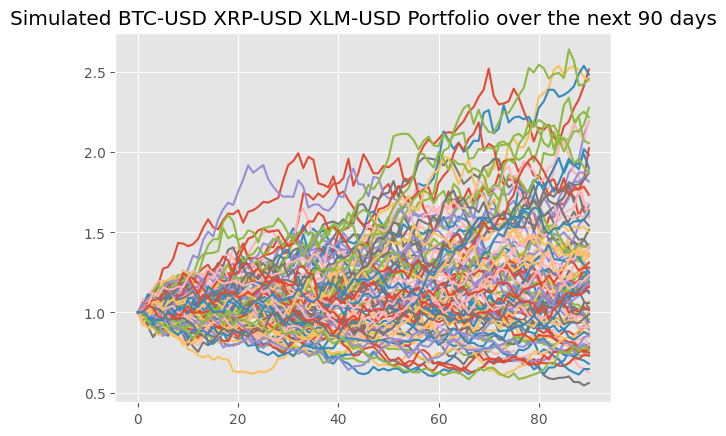

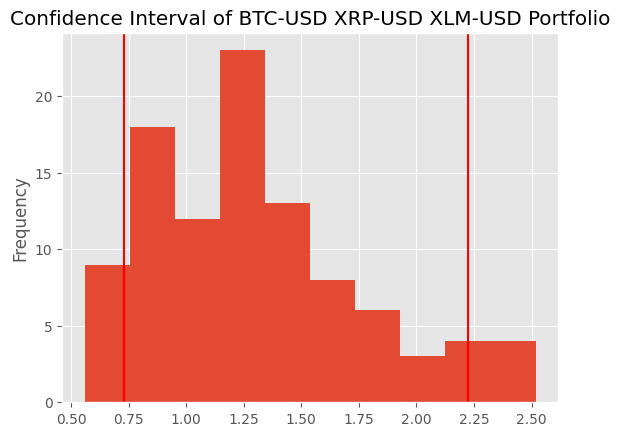

,BTC-USD,XLM-USD,XRP-USD
BTC-USD,1.000000,0.818471,0.755168
XLM-USD,0.818471,1.000000,0.748815
XRP-USD,0.755168,0.748815,1.000000


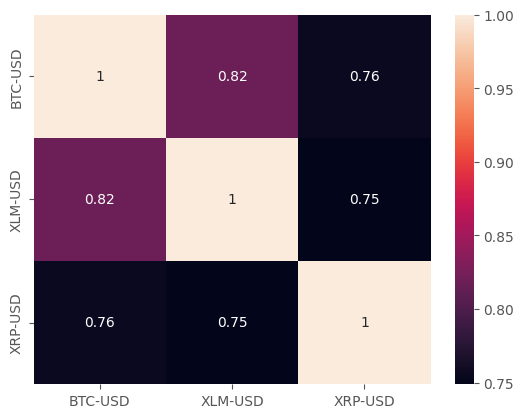

In [9]:
df = get_data(basket2)
curr1_last_price,curr2_last_price, curr3_last_price = fetch_last_price(df, basket2)
daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return = pct_change_std_mean(df)
monte_carlo = monte_carlo_simulation(basket2)
graph(basket2)
graph2(basket2)
#correlation
display(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

### Basket_3

[*********************100%***********************]  3 of 3 completed
Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulati

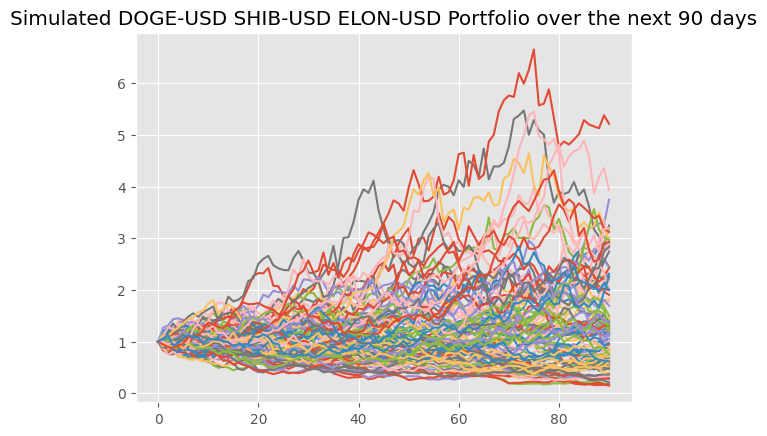

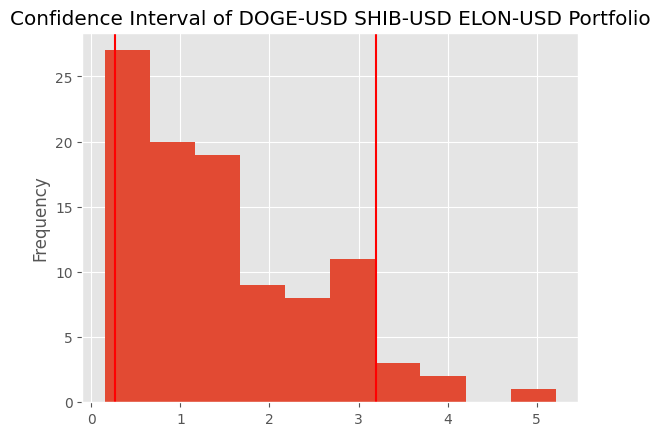

,DOGE-USD,ELON-USD,SHIB-USD
DOGE-USD,1.000000,0.032285,0.036388
ELON-USD,0.032285,1.000000,0.848619
SHIB-USD,0.036388,0.848619,1.000000


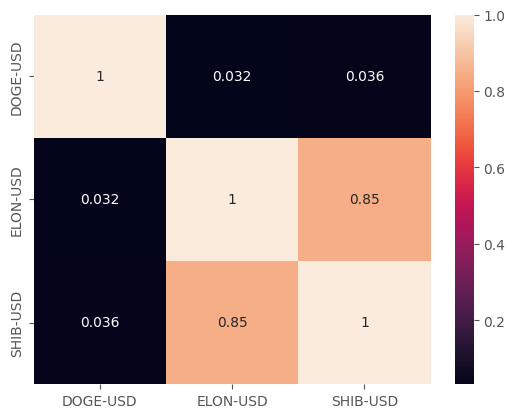

In [10]:
df = get_data(basket3)
curr1_last_price,curr2_last_price, curr3_last_price = fetch_last_price(df, basket3)
daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return = pct_change_std_mean(df)
monte_carlo = monte_carlo_simulation(basket3)
graph(basket3)
graph2(basket3)
#correlation
display(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()